<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/pca_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes: Principal Component Analysis (PCA) for Biologists

* Lectures notes and exercises for teaching PCA

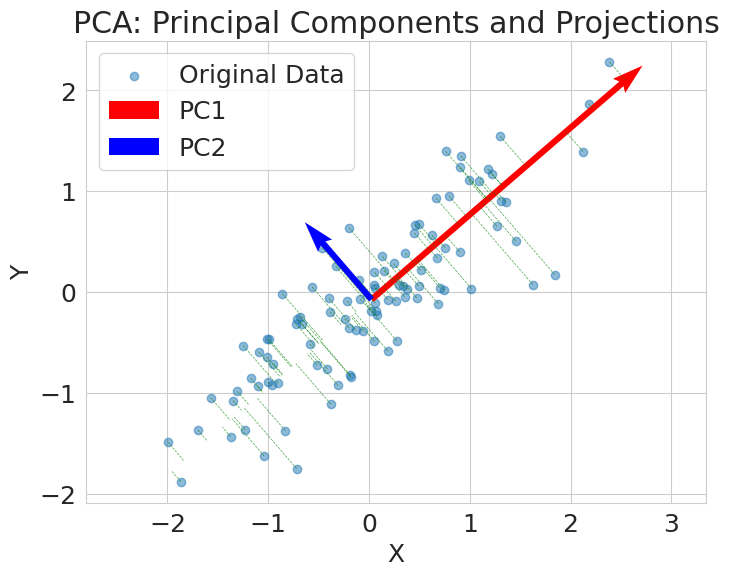

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic 2D data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

# Fit PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Get principal component vectors
origin = np.mean(X, axis=0)
pc1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
pc2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 3

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.quiver(*origin, *pc1, color='r', scale=1, scale_units='xy', angles='xy', width=0.01, label='PC1')
plt.quiver(*origin, *pc2, color='b', scale=1, scale_units='xy', angles='xy', width=0.01, label='PC2')

# Project points onto PC1
for point in X:
    proj = origin + np.dot((point - origin), pca.components_[0]) * pca.components_[0]
    plt.plot([point[0], proj[0]], [point[1], proj[1]], 'g--', linewidth=0.5, alpha=0.7)
plt.title('PCA: Principal Components and Projections')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

## Intuition (Maximimizing variance captured)

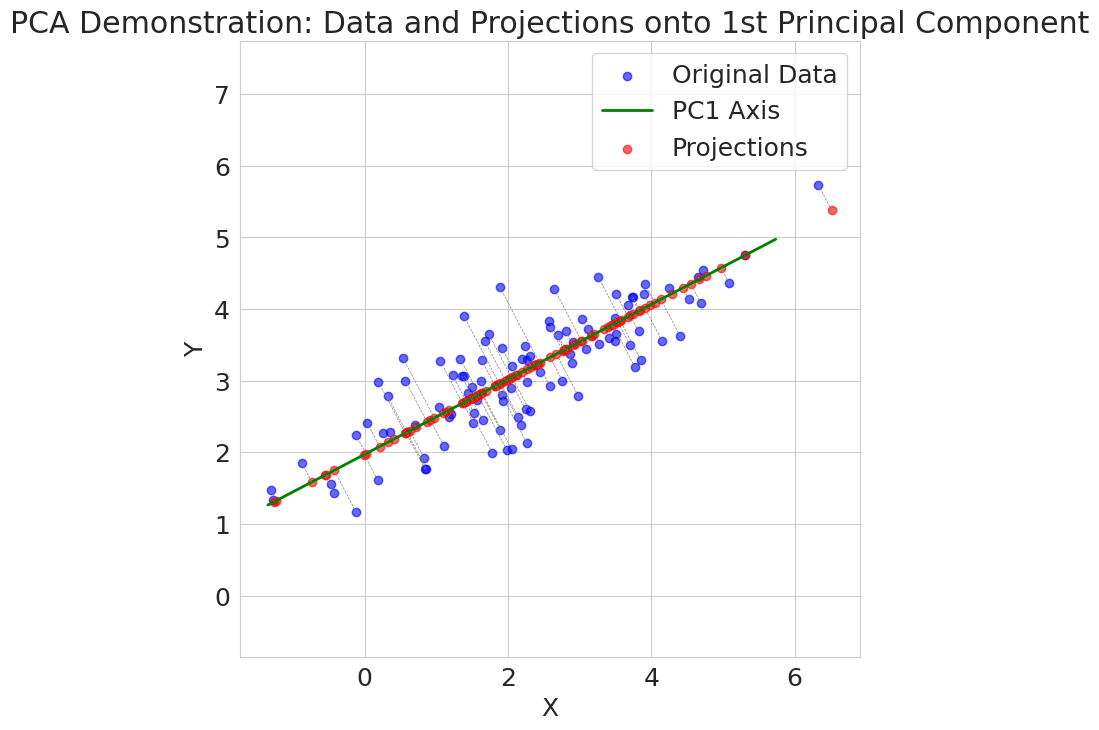

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D data
np.random.seed(42)
mean = np.array([2, 3])
cov = np.array([[3, 1.5], [1.5, 1]])
data = np.random.multivariate_normal(mean, cov, size=100)

# Center data
data_mean = np.mean(data, axis=0)
centered_data = data - data_mean

# Compute covariance matrix and eigen decomposition
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Principal component (first, largest eigenvalue)
pc1 = eigenvectors[:, np.argmax(eigenvalues)]

# Project each point onto PC1
projections = np.dot(centered_data, pc1)[:, np.newaxis] * pc1
projected_points = projections + data_mean

# Plotting
plt.figure(figsize=(8, 8))
# Original data points
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.6, label='Original Data')
# Principal component axis line
line_points = np.array([data_mean - 4*pc1, data_mean + 4*pc1])
plt.plot(line_points[:, 0], line_points[:, 1], color='green', linewidth=2, label='PC1 Axis')
# Projected points
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='red', alpha=0.6, label='Projections')

# Connect each original point to its projection
for original, proj in zip(data, projected_points):
    plt.plot([original[0], proj[0]], [original[1], proj[1]], color='gray', linestyle='--', linewidth=0.5)

plt.axis('equal')
plt.title('PCA Demonstration: Data and Projections onto 1st Principal Component')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Lecture Notes: Principal Component Analysis (PCA) for Biologists

## 🧬 Overview

Principal Component Analysis (PCA) is a **dimensionality reduction technique**. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.

It is widely used in biology for:

* Gene expression analysis
* Population genetics
* Imaging data
* Single-cell RNA-seq

---

## 🧠 Intuition

Imagine you have a dataset with many variables (e.g. expression levels of 10,000 genes). PCA helps us:

* Reduce the number of variables
* Identify patterns
* Remove noise
* Visualize high-dimensional data

PCA finds **new axes** (called **principal components**) that capture the maximum variance in the data.

*Step 1*: Normalize the data
Subtract the mean and divide by the standard deviation so the data is centered at the origin.

*Step 2*: Find the direction of maximum variance
PCA finds a new axis (PC1) that goes through the direction where the data varies the most:



*Step 3*: Project the data onto the new axes
Each data point is now described by its position along PC1 and (optionally) PC2.


PC1 captures the most variance in the data.
PC2 (perpendicular to PC1) captures the next most variance.

*Summary*:

PCA rotates the axes of your data so the greatest variation comes along the first principal components, allowing you to reduce dimensionality while keeping the most important information.


---



## 🧬 Overview

Principal Component Analysis (PCA) is a **dimensionality reduction technique**. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.

It is widely used in biology for:

* Gene expression analysis
* Population genetics
* Imaging data
* Single-cell RNA-seq

---


## 📊 Key Concepts


### 1. **Scores and Loadings**

The `scores` for each principal component are calculated as follows:

$PC_{1} = \alpha X + \beta Y + \gamma Z + .... $

where $X$, $Y$ and $Z$ are the normalized *features*.

The constants $\alpha$, $\beta$, $\gamma$ are determined by the PCA algorithm. They are called the `loadings`.


### 2. **Variance**

* Variance = how spread out the data is.
* PCA finds directions (principal components) that maximize variance.

Formula for variance of variable $x$:

$$
\text{Var}(x) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


---

## 🧪 Step-by-Step PCA Procedure

Given a dataset with samples (rows) and features (columns):

1. **Standardize** the data (mean = 0, variance = 1)
2. **Compute the covariance matrix**
3. **Calculate eigenvectors and eigenvalues**
4. **Sort** eigenvectors by decreasing eigenvalues
5. **Choose top k** eigenvectors (components)
6. **Project data** onto these components

---

## 🔬 Example: Gene Expression Data

* Rows = samples (patients)
* Columns = gene expression levels

### Goal:

* Reduce dimensionality from 20,000 genes to 2-3 PCs
* Visualize patterns between patient groups (e.g., healthy vs. cancer)

```python
# Sample Python code (requires numpy, sklearn, matplotlib)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = ...  # gene expression matrix
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression')
plt.show()
```

---

## 📈 Interpreting the Output

* **Scree plot**: plots variance explained by each PC
* **Loadings**: show how much each original variable contributes to each PC
* **Biplots**: show samples and variables in the same plot

---

## Practical

* https://projector.tensorflow.org/


## 🧠 PCA vs. Other Techniques

* PCA is **unsupervised** (no labels used)
* Works best for **linear** relationships
* Alternatives:

  * t-SNE / UMAP for nonlinear structures
  * LDA (Linear Discriminant Analysis) for classification tasks

---

## 🧬 In Practice: Tips for Biologists

* Always **standardize** data before PCA
* Use **log-transformation** for count data (e.g., RNA-seq)
* Be cautious interpreting PCs biologically—PCs are **mathematical constructs**

---

## ❓ Q\&A

* Q: Can PCA tell me which genes are important?

  * A: It shows which genes contribute most to the components (loadings), but doesn't test statistical significance.

* Q: How many PCs should I keep?

  * A: Use the **elbow rule** on the scree plot or **choose enough PCs to explain \~90% variance**.

---


## Simple code for PCA on US Arrests data

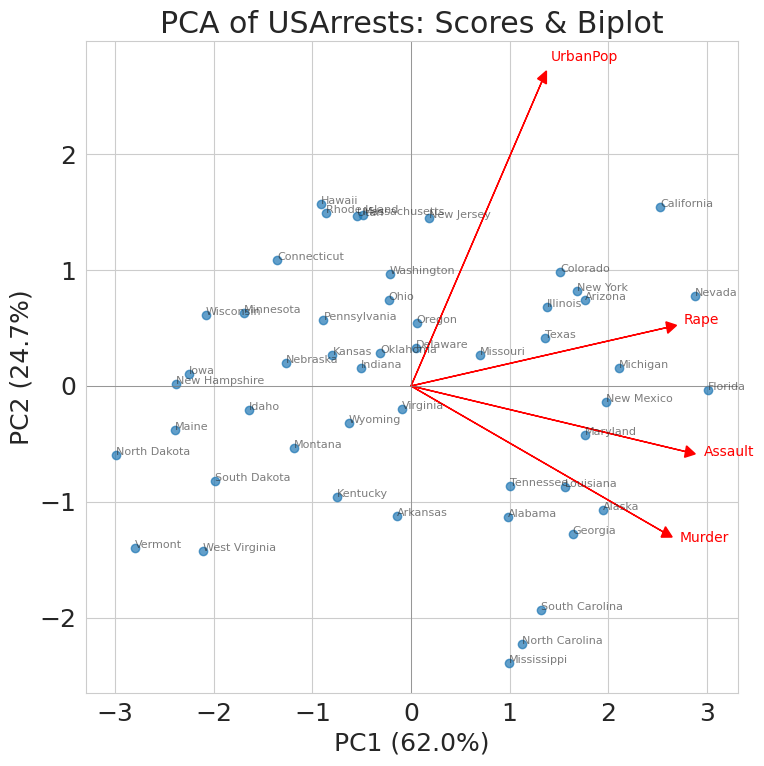

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# 1. Load the USArrests data from R's "datasets" package
data = sm.datasets.get_rdataset('USArrests', 'datasets').data
data.index.name = 'State'

# 2. Standardize the variables
features = ['Murder','Assault','UrbanPop','Rape']
X = data[features].values
X_std = StandardScaler().fit_transform(X)

# 3. Fit PCA (2 components)
pca = PCA(n_components=2)
scores = pca.fit_transform(X_std)

# 4a. Scatter of the first two principal components
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1], alpha=0.7)
for i, state in enumerate(data.index):
    ax.text(scores[i,0], scores[i,1], state, fontsize=8, alpha=0.6)

ax.set_xlabel('PC1 (%.1f%%)' % (pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 (%.1f%%)' % (pca.explained_variance_ratio_[1]*100))
ax.set_title('PCA of USArrests: Scores & Biplot')

# 4b. Biplot: overlay the loadings as arrows
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(features):
    ax.arrow(0, 0,
             loadings[i,0]*3,  # scale factor for visibility
             loadings[i,1]*3,
             head_width=0.1, head_length=0.1, color='red')
    ax.text(loadings[i,0]*3.2, loadings[i,1]*3.2, feature,
            color='red', fontsize=10)

plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.tight_layout()
plt.show()


### Table of loadings

In [78]:
# 5. Table of loadings
#   Component axes × original features
loading_df = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=['PC1','PC2']
)
print("\nPCA Loadings (components):")
print(loading_df)


PCA Loadings (components):
               PC1       PC2
Murder    0.535899 -0.418181
Assault   0.583184 -0.187986
UrbanPop  0.278191  0.872806
Rape      0.543432  0.167319


## Animation

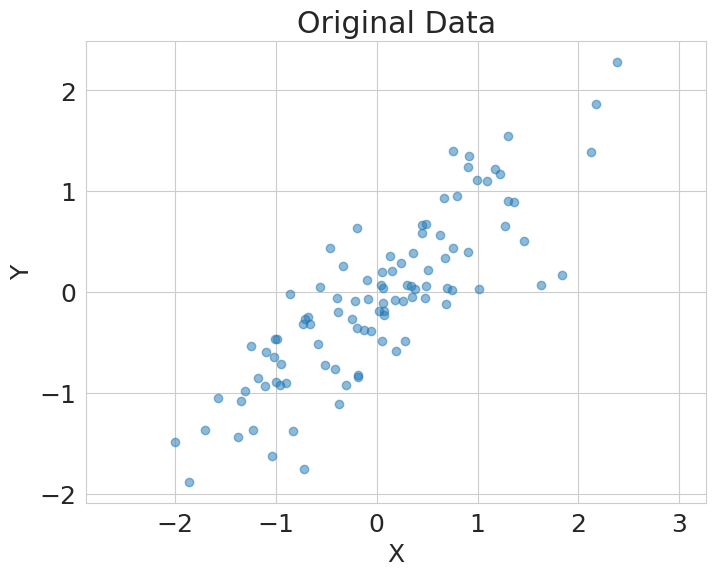

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.animation as animation
from IPython.display import HTML

# Generate synthetic 2D data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

In [80]:
def rotate_data(X, angle_deg):
    """Rotates the data by a given angle in degrees."""
    angle_rad = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad), np.cos(angle_rad)]])
    return X @ R

In [81]:
angles = np.arange(0, 360, 5)  # Angles for rotation
pca_results = []

for angle in angles:
    X_rotated = rotate_data(X, angle)
    pca = PCA(n_components=2)
    pca.fit(X_rotated)
    X_pca_rotated = pca.transform(X_rotated)

    # Get principal component vectors
    origin = np.mean(X_rotated, axis=0)
    pc1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
    pc2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 3

    # Project points onto PC1
    projections = np.array([origin + np.dot((point - origin), pca.components_[0]) * pca.components_[0] for point in X_rotated])

    pca_results.append({
        'angle': angle,
        'X_rotated': X_rotated,
        'origin': origin,
        'pc1': pc1,
        'pc2': pc2,
        'projections': projections
    })

print(f"Computed PCA for {len(pca_results)} angles.")

Computed PCA for 72 angles.


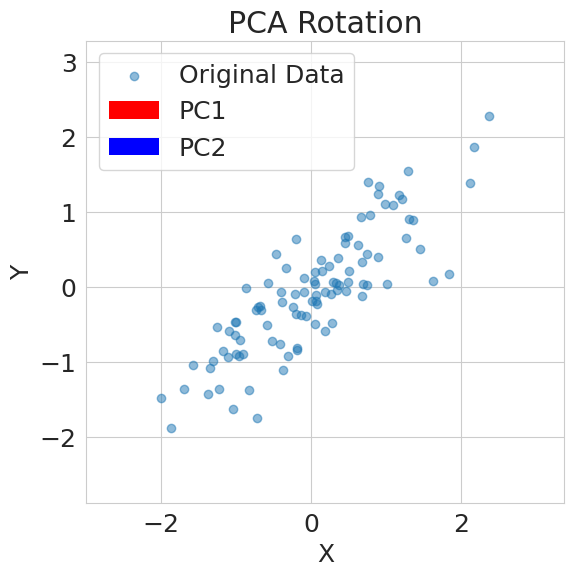

In [82]:
# Set up the figure and axes for the animation
fig, ax = plt.subplots(figsize=(8, 6))

# Set plot limits based on the original data to keep axes consistent
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('PCA Rotation')
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

# Initialize plot elements that will be updated
scatter_plot = ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data') # Keep data static
pc1_quiver = ax.quiver([], [], [], [], color='r', scale=1, scale_units='xy', angles='xy', width=0.02, label='PC1') # Increased width
pc2_quiver = ax.quiver([], [], [], [], color='b', scale=1, scale_units='xy', angles='xy', width=0.02, label='PC2') # Increased width
projection_lines = [ax.plot([], [], 'g--', linewidth=0.5, alpha=0.7)[0] for _ in range(X.shape[0])]
legend = ax.legend()

# Function to initialize the animation
def init():
    # scatter_plot.set_offsets(np.empty((0, 2))) # Data is static, no need to update
    pc1_quiver.set_offsets(np.empty((0, 2)))
    pc1_quiver.set_UVC(np.empty((0)), np.empty((0)))
    pc2_quiver.set_offsets(np.empty((0, 2)))
    pc2_quiver.set_UVC(np.empty((0)), np.empty((0)))
    for line in projection_lines:
        line.set_data([], [])
    return [scatter_plot, pc1_quiver, pc2_quiver] + projection_lines + [legend]

# Function to update the animation frame
def update(frame_data):
    angle = frame_data['angle']
    X_rotated = frame_data['X_rotated'] # This is the original data now
    origin = np.mean(X_rotated, axis=0) # Recalculate origin based on original data
    pc1 = frame_data['pc1'] * 1.2 # Increased length
    pc2 = frame_data['pc2'] * 1.2 # Increased length
    projections = frame_data['projections']

    ax.set_title(f'PCA Rotation (Angle: {angle}°)')

    # Update scatter plot data - data is static, no need to update
    # scatter_plot.set_offsets(X_rotated)

    # Update quiver plots for PC vectors
    pc1_quiver.set_offsets([origin])
    pc1_quiver.set_UVC([pc1[0]], [pc1[1]])
    pc2_quiver.set_offsets([origin])
    pc2_quiver.set_UVC([pc2[0]], [pc2[1]])

    # Update projection lines
    for i in range(X_rotated.shape[0]):
        projection_lines[i].set_data([X_rotated[i, 0], projections[i, 0]],
                                     [X_rotated[i, 1], projections[i, 1]])

    return [scatter_plot, pc1_quiver, pc2_quiver] + projection_lines + [legend]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=pca_results, init_func=init, blit=True)

# To display the animation in the notebook, uncomment the following line
# plt.close(fig) # Prevent the static plot from showing
# HTML(ani.to_jshtml())

In [83]:
# Save the animation as a GIF
# To save the GIF, you might need to install imagemagick:
# !apt-get install imagemagick

# ani.save('pca_rotation.gif', writer='imagemagick', fps=10)

# Display the animation in the notebook
plt.close(fig) # Close the static plot
HTML(ani.to_jshtml())

# Task
Generate Python code to perform PCA on synthetic data, display the biplot, and generate the elbow curve/scree plot.

## Generate synthetic data

Create a synthetic dataset suitable for PCA.


**Reasoning**:
The subtask requires generating synthetic data using `make_blobs` and printing its shape. These steps can be combined into a single code block.



In [84]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, n_features=5, centers=3, random_state=42)

# Print the shape of the generated data
print(X.shape)

(100, 5)


## Perform PCA

Apply PCA to the synthetic data.


**Reasoning**:
Apply PCA to the standardized synthetic data.



In [85]:
from sklearn.preprocessing import StandardScaler

# Standardize the data X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with all components
pca = PCA(n_components=X_scaled.shape[1])

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Transform the standardized data
X_pca = pca.transform(X_scaled)

print("Shape of standardized data:", X_scaled.shape)
print("Shape of PCA-transformed data:", X_pca.shape)
print("Explained variance ratio by component:", pca.explained_variance_ratio_)

Shape of standardized data: (100, 5)
Shape of PCA-transformed data: (100, 5)
Explained variance ratio by component: [0.5211985  0.40135775 0.05826032 0.01474168 0.00444175]


## Generate scree plot

Create and display a scree plot to show the explained variance ratio by each principal component.


**Reasoning**:
Generate and display the scree plot based on the PCA results.



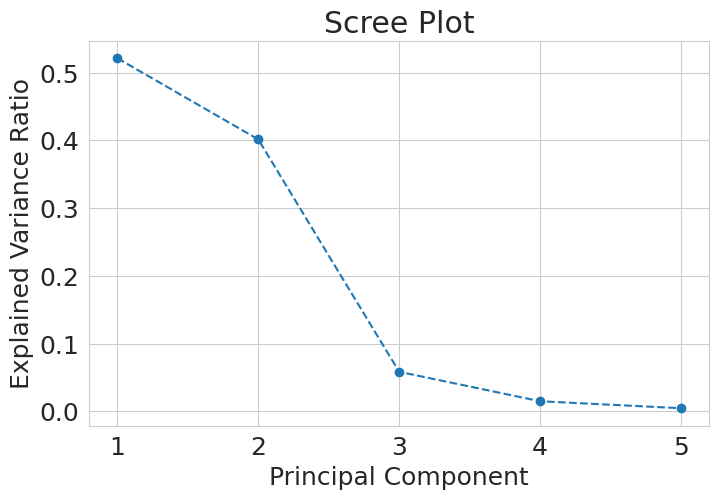

In [86]:
# Create a figure and axes for the plot
plt.figure(figsize=(8, 5))

# Plot the explained variance ratio
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')

# Add title and labels
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

## Generate biplot

Create and display a biplot to visualize the relationship between the principal components, the data points, and the original features.


**Reasoning**:
Generate the Python code to create and display the biplot as per the instructions.



In [87]:
# Calculate scaled eigenvectors for plotting
# The eigenvectors pca.components_ are already scaled by singular values in the fit method,
# but multiplying by sqrt(explained_variance_) scales them to represent the variance
# captured by each component, which is useful for the biplot.
# However, for visualizing the direction and relative importance, scaling by a constant factor
# is often done for better visibility on the same plot as the data points.
# Let's use a scaling factor that makes the vectors visible relative to the data spread.
# A common approach is to scale them by the square root of the eigenvalues (explained_variance_)
# which represents the standard deviation captured by each component.
# Then, scale by an additional factor for visibility.
eigenvectors = pca.components_.T # Transpose to get components as columns
explained_variance = pca.explained_variance_

# Scale eigenvectors for plotting
# Scale by sqrt(explained_variance) and then by an arbitrary factor for visualization
scaling_factor = 3 # Adjust this factor as needed for better visualization
scaled_eigenvectors = eigenvectors * np.sqrt(explained_variance) * scaling_factor

# Set up the figure and axes for the biplot
plt.figure(figsize=(10, 8))

# 1. Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# 2. Set the limits of the x and y axes
# Determine the range of the data and the scaled eigenvectors
max_data_abs = np.max(np.abs(X_pca[:, :2]))
max_vector_abs = np.max(np.abs(scaled_eigenvectors[:, :2]))
plot_limit = max(max_data_abs, max_vector_abs) * 1.2 # Add some padding

plt.xlim(-plot_limit, plot_limit)
plt.ylim(-plot_limit, plot_limit)

# 3. Add arrows representing the original features
origin = [0, 0]
for i in range(scaled_eigenvectors.shape[0]):
    plt.quiver(*origin, scaled_eigenvectors[i, 0], scaled_eigenvectors[i, 1],
               color='r', scale=1, scale_units='xy', angles='xy', width=0.005)

    # 4. Add labels to the arrows
    # For synthetic data with 5 features, label them 'Feature 1' to 'Feature 5'
    plt.text(scaled_eigenvectors[i, 0] * 1.05, scaled_eigenvectors[i, 1] * 1.05,
             f'Feature {i+1}', color='r', ha='center', va='center')


# 5. Add labels to the x and y axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 6. Add a title to the plot
plt.title('PCA Biplot')

# 7. Include a grid
plt.grid(True)

# Set aspect ratio to equal to avoid distortion
plt.gca().set_aspect('equal', adjustable='box')

# 8. Display the plot
plt.show()

## Alternative way to generate PCA biplot

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a biplot
plt.figure(figsize=(8, 6))

# Plot the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color='blue', label='Data Points')

# Plot the principal components as arrows
for i in range(X.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.8, width=0.005, head_width=0.1)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             X.columns[i], color='black', ha='center', va='center')

# Labels and Title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot for California Housing Data')

# Show plot
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.25336868 0.23516245]


## Alternative code for PCA biplot

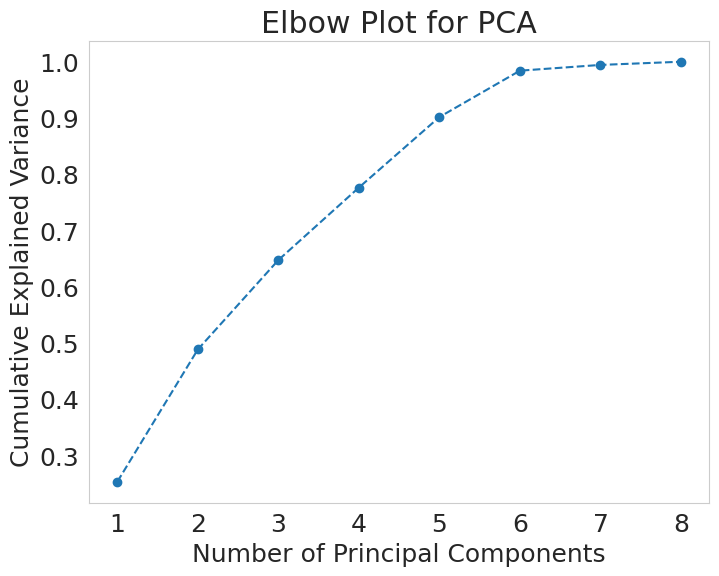

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute PCA for multiple components
num_components = len(california.feature_names)
pca = PCA(n_components=num_components)
pca.fit(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The synthetic dataset consists of 100 samples and 5 features.
*   PCA was performed retaining all 5 principal components.
*   The scree plot visualizes the explained variance ratio for each principal component, showing how much variance each component captures.
*   The biplot shows the data points projected onto the first two principal components, along with arrows representing the original features and their contribution to these components.

### Insights or Next Steps

*   Analyze the scree plot to determine the "elbow point" and select the optimal number of principal components to retain for dimensionality reduction.
*   Interpret the biplot to understand which original features contribute most to the first two principal components and how data points cluster in the reduced-dimensional space.


## Exercise (theoretical)

* Given a PCA biplot from real genomic data, interpret it


In [90]:
#import numpy as np
#import matplotlib.pyplot as plt

## -----------------------------------------------------------------------------
## 1) Define the loading matrix (genes × PCs) exactly as given:
##    rows = [Gene1, Gene2, Gene3, Gene4]
##    columns = [PC1, PC2, PC3, PC4]
#loadings = np.array([
#    [-0.5358995,   0.4181809,  -0.3412327,  0.6492278],   # Gene1
#    [-0.5831836,   0.1879856,  -0.2681484, -0.7430748],   # Gene2
#    [-0.2781909,  -0.8728062,  -0.3780158,  0.1338773],   # Gene3
#    [-0.5434321,  -0.1673186,   0.8177779,  0.08902432],  # Gene4
#])
#genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4']

## -----------------------------------------------------------------------------
## 2) (For demonstration) generate 50 “sample scores” on the same 4 PCs.
##    Replace this with your actual PCA-transformed data!
#np.random.seed(0)
#sample_scores = np.random.randn(50, 4)
#sample_labels = [f"Sample{i+1}" for i in range(sample_scores.shape[0])]

## -----------------------------------------------------------------------------
## 3) Make the biplot for PC2 vs PC3:
#fig, ax = plt.subplots(figsize=(10,10))

## 3a) scatter the samples
#ax.scatter(sample_scores[:,1], sample_scores[:,2],
#           c='black', s=20, alpha=0.7, label='Samples')
#for i, txt in enumerate(sample_labels):
#    ax.text(sample_scores[i,1], sample_scores[i,2], txt,
#            fontsize=6, ha='center', va='center')

## 3b) draw the gene loadings as red arrows
##    You may need to adjust `scale` so that the arrows reach nicely into the
##    cloud of points:
#scale = 3.0
#for i, gene in enumerate(genes):
#    x_load = loadings[i,1] * scale  # PC2 loading
#    y_load = loadings[i,2] * scale  # PC3 loading
#    ax.arrow(0, 0, x_load, y_load,
#             color='red', width=0.005, head_width=0.1, length_includes_head=True)
#    ax.text(x_load*1.15, y_load*1.15, gene,
#            color='red', fontsize=12, fontweight='bold')

## -----------------------------------------------------------------------------
## 4) beautify
#ax.axhline(0, color='gray', linewidth=1)
#ax.axvline(0, color='gray', linewidth=1)
#ax.set_xlabel('PC2', fontsize=14)
#ax.set_ylabel('PC3', fontsize=14)
#ax.set_title('PCA Biplot (PC2 vs PC3)', fontsize=16)
#ax.set_aspect('equal', 'box')
#ax.grid(False)

#plt.tight_layout()
#plt.show()


### A sample PCA biplot

* Shown are biological samples with scores

* The features are genes

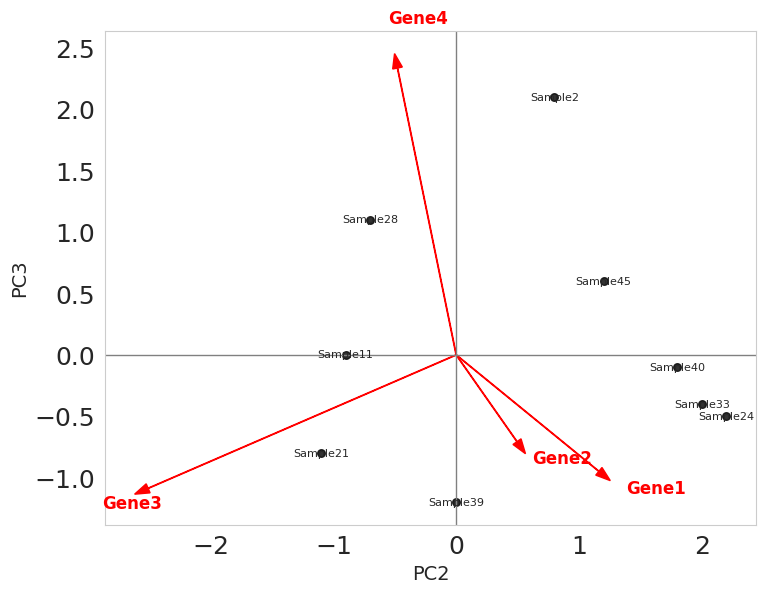

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1) Loadings matrix (genes × PCs) exactly as given:
loadings = np.array([
    [-0.5358995,   0.4181809,  -0.3412327,  0.6492278],   # Gene1
    [-0.5831836,   0.1879856,  -0.2681484, -0.7430748],   # Gene2
    [-0.2781909,  -0.8728062,  -0.3780158,  0.1338773],   # Gene3
    [-0.5434321,  -0.1673186,   0.8177779,  0.08902432],  # Gene4
])
genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4']


# -----------------------------------------------------------------------------
# 2) Approximate PC2/PC3 scores from your biplot.
#    Fill in all 50 samples by eyeballing their (x, y) positions on the plot.
scores_dict = {
    # highlighted points:
    'Sample2':  (0.8,  2.1),
    'Sample24': (2.2, -0.5),
    'Sample33': (2.0, -0.4),
    # a few others for context:
    'Sample45': (1.2,  0.6),
    'Sample40': (1.8, -0.1),
    'Sample11': (-0.9, 0.0),
    'Sample39': (0.0, -1.2),
    'Sample28': (-0.7, 1.1),
    'Sample21': (-1.1, -0.8),
}

sample_labels = list(scores_dict.keys())
sample_scores = np.array([scores_dict[s] for s in sample_labels])


# -----------------------------------------------------------------------------
# 3) Plot PC2 vs PC3 biplot:
fig, ax = plt.subplots(figsize=(8,8))

# 3a) scatter the samples
ax.scatter(sample_scores[:,0], sample_scores[:,1],
           c='black', s=30, alpha=0.8)
for i, lbl in enumerate(sample_labels):
    ax.text(sample_scores[i,0], sample_scores[i,1], lbl,
            fontsize=8, ha='center', va='center')

# 3b) draw the gene loadings as red arrows
scale = 3.0
for i, gene in enumerate(genes):
    x_load = loadings[i,1] * scale  # PC2 loading
    y_load = loadings[i,2] * scale  # PC3 loading
    ax.arrow(0, 0, x_load, y_load,
             color='red', width=0.004, head_width=0.08,
             length_includes_head=True)
    ax.text(x_load*1.1, y_load*1.1, gene,
            color='red', fontsize=12, fontweight='bold')

# -----------------------------------------------------------------------------
# 4) Styling
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)
ax.set_xlabel('PC2', fontsize=14)
ax.set_ylabel('PC3', fontsize=14)
#ax.set_title('PCA Biplot', fontsize=10)
ax.set_aspect('equal', 'box')
ax.grid(False)

plt.tight_layout()
plt.show()


### Let us visualize the loadings

In [92]:
pcs   = ['PC1', 'PC2', 'PC3', 'PC4']

# 2) build a DataFrame
df = pd.DataFrame(loadings, index=genes, columns=pcs)

# 3) print it
print(df.to_string(float_format="{:.6f}".format))

            PC1       PC2       PC3       PC4
Gene1 -0.535899  0.418181 -0.341233  0.649228
Gene2 -0.583184  0.187986 -0.268148 -0.743075
Gene3 -0.278191 -0.872806 -0.378016  0.133877
Gene4 -0.543432 -0.167319  0.817778  0.089024


### Exercise

* Break up into groups and discuss the following

* Why are `Sample 33` and `Sample 24` separated from the rest? What can we say about `Gene1`, `Gene 2`, `Gene 3` and `Gene 4`?

* Why is `Sample 2` separated from the rest? What can we say about `Gene1`, `Gene 2`, `Gene 3` and `Gene 4`?

* Can we treat `Sample 2` as an outlier? Why or why not? Argue your case.


## ✅ Summary

* PCA = powerful tool for reducing and visualizing high-dimensional data
* Especially useful in biology for gene expression and population structure
* Remember: PCA simplifies data, but interpretation must remain biologically grounded


## References

[1] https://projector.tensorflow.org/

US Arrests Data (first 5 rows):
            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Data shape: (50, 4)


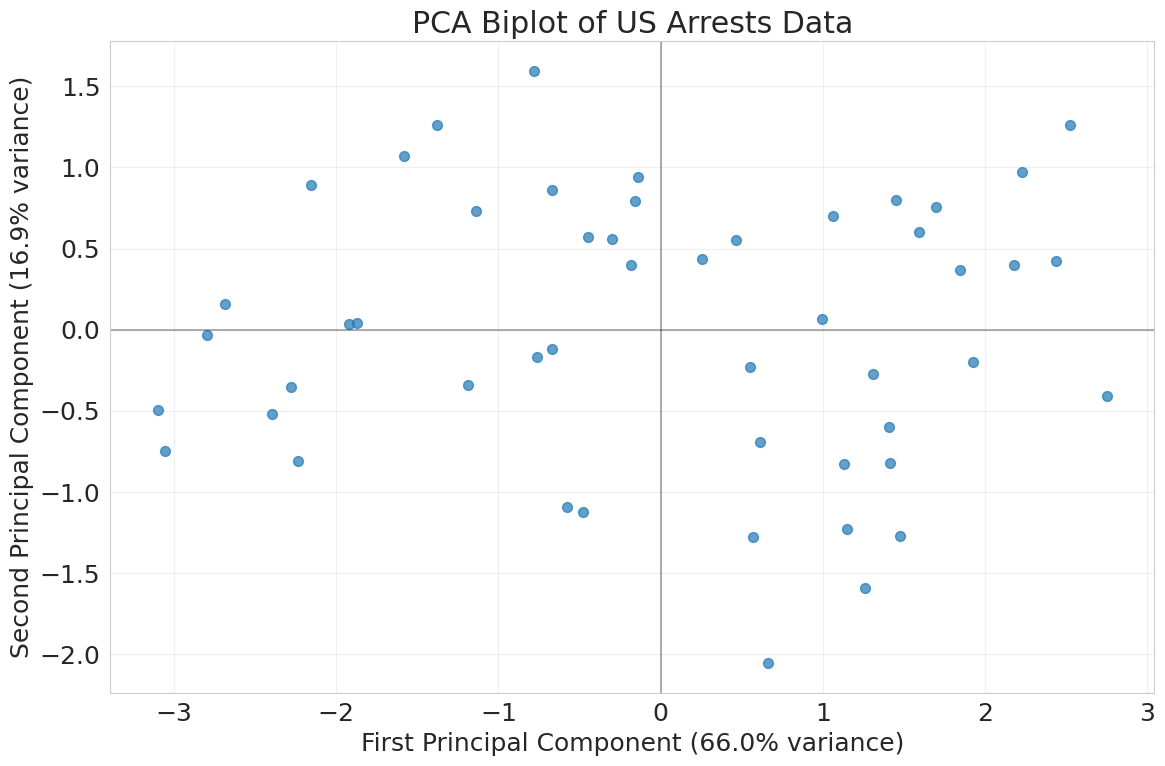


Explained variance ratio:
PC1: 0.660 (66.0%)
PC2: 0.169 (16.9%)
Total: 0.829 (82.9%)

Variable loadings (PC1, PC2):
Murder: (0.504, -0.542)
Assault: (0.551, -0.215)
UrbanPop: (0.433, 0.808)
Rape: (0.505, 0.083)


In [93]:
# Simple PCA Biplot for US Arrest Data (Beginner Version)
# No for loops for state labels - much simpler!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the US Arrests data
us_arrests_data = {
    'Murder': [13.2, 10.0, 8.1, 8.8, 9.0, 7.9, 3.3, 5.9, 15.4, 17.4, 5.3, 2.6, 10.4, 7.2, 2.2, 6.0, 9.7, 15.4, 2.1, 11.3, 2.7, 16.5, 9.0, 6.0, 4.3, 12.1, 2.5, 0.8, 7.1, 11.4, 13.0, 6.8, 4.5, 12.2, 9.7, 6.6, 3.4, 14.4, 10.9, 11.1, 13.0, 6.3, 3.4, 1.4, 12.5, 9.0, 6.9, 4.2, 12.9, 5.3],
    'Assault': [236, 263, 294, 190, 276, 204, 110, 238, 335, 211, 46, 120, 249, 113, 56, 115, 109, 249, 83, 300, 72, 251, 120, 151, 96, 255, 53, 62, 178, 188, 337, 142, 169, 332, 293, 336, 86, 279, 159, 285, 337, 51, 120, 82, 257, 275, 243, 233, 337, 80],
    'UrbanPop': [58, 48, 80, 50, 91, 78, 77, 72, 80, 60, 83, 54, 62, 72, 66, 75, 82, 64, 39, 67, 70, 53, 65, 56, 51, 83, 51, 39, 71, 70, 91, 72, 74, 68, 87, 82, 45, 70, 53, 72, 80, 60, 67, 53, 95, 73, 76, 58, 90, 44],
    'Rape': [21.2, 44.5, 31.0, 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2, 14.2, 24.0, 21.0, 11.3, 18.0, 16.3, 22.2, 7.8, 27.8, 16.1, 17.5, 16.8, 15.6, 9.0, 35.1, 8.1, 11.6, 26.8, 23.0, 16.1, 21.4, 24.8, 18.0, 26.2, 20.2, 12.8, 22.5, 18.5, 25.5, 22.9, 11.6, 18.9, 8.3, 28.9, 24.9, 21.9, 17.1, 26.4, 12.8]
}

# State names
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# Create DataFrame
df = pd.DataFrame(us_arrests_data, index=states)

print("US Arrests Data (first 5 rows):")
print(df.head())
print("\nData shape:", df.shape)

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Step 3: Create the biplot (no for loops!)
plt.figure(figsize=(12, 8))

# Plot the data points (states) - simple scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, s=50)

# Plot the variable vectors (arrows) - simple arrow plot
loadings = pca.components_.T
scale_factor = 3


# Add labels and title
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA Biplot of US Arrests Data')
plt.grid(True, alpha=0.3)

# Add reference lines at origin
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
print(f"\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"Total: {sum(pca.explained_variance_ratio_[:2]):.3f} ({sum(pca.explained_variance_ratio_[:2])*100:.1f}%)")

print(f"\nVariable loadings (PC1, PC2):")
print(f"Murder: ({loadings[0, 0]:.3f}, {loadings[0, 1]:.3f})")
print(f"Assault: ({loadings[1, 0]:.3f}, {loadings[1, 1]:.3f})")
print(f"UrbanPop: ({loadings[2, 0]:.3f}, {loadings[2, 1]:.3f})")
print(f"Rape: ({loadings[3, 0]:.3f}, {loadings[3, 1]:.3f})")

1. PRINCOMP Package (R-like biplot)
Install: pip install princomp
Best for: R users, statistical analysis
Features: Very similar to R's biplot() function
--------------------------------------------------

2. PLOTLY Package
Install: pip install plotly
Best for: Interactive plots, web applications
Features: Hover information, zoom, pan, export
--------------------------------------------------

3. SEABORN + MATPLOTLIB
Install: pip install seaborn
Best for: Publication-quality plots, customization
Features: Beautiful styling, extensive customization
--------------------------------------------------

4. PYTHON-BIPLOT Package
Install: pip install python-biplot
Best for: Quick biplots, simple syntax
Features: Dedicated biplot functions
--------------------------------------------------

5. SCIPY.STATS
Install: pip install scipy
Best for: Statistical analysis, scientific computing
Features: Integration with statistical tests
--------------------------------------------------

6. PRINCOMPY P

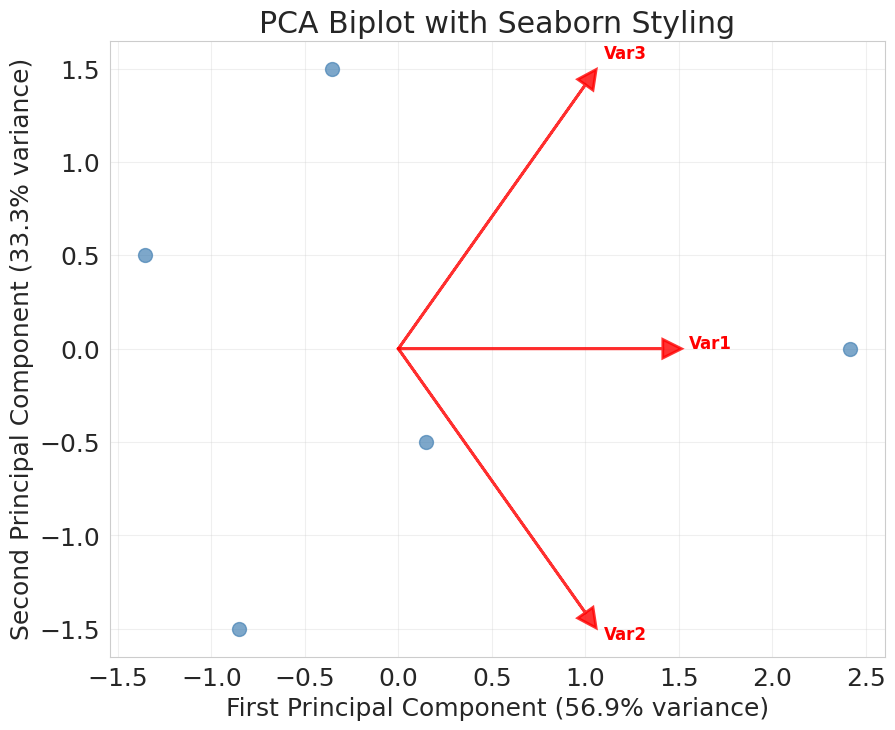

In [94]:
# Python Packages for Creating Biplots
# Here are the most popular packages with examples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data for examples
data = {
    'Var1': [1, 2, 3, 4, 5],
    'Var2': [2, 4, 1, 3, 5],
    'Var3': [3, 1, 4, 2, 5]
}
df = pd.DataFrame(data)

# ============================================================================
# 1. PRINCOMP (R-like biplot in Python)
# ============================================================================
print("1. PRINCOMP Package (R-like biplot)")
print("Install: pip install princomp")
print("Best for: R users, statistical analysis")
print("Features: Very similar to R's biplot() function")
print("-" * 50)

# Example usage (after installing):
# from princomp import biplot
# biplot(pca_result, loadings, var_names=['Var1', 'Var2', 'Var3'])

# ============================================================================
# 2. PLOTLY (Interactive biplots)
# ============================================================================
print("\n2. PLOTLY Package")
print("Install: pip install plotly")
print("Best for: Interactive plots, web applications")
print("Features: Hover information, zoom, pan, export")
print("-" * 50)

# Example with plotly:
import plotly.graph_objects as go
import plotly.express as px

# Standardize and apply PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
loadings = pca.components_.T

# Create interactive biplot with plotly
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    mode='markers+text',
    text=[f'Point {i+1}' for i in range(len(pca_result))],
    name='Data Points',
    marker=dict(size=10, color='blue')
))

# Add variable vectors
scale_factor = 2
for i, var in enumerate(df.columns):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0] * scale_factor],
        y=[0, loadings[i, 1] * scale_factor],
        mode='lines+markers+text',
        line=dict(color='red', width=3),
        marker=dict(size=8, color='red'),
        text=[f'{var}'],
        textposition='top center',
        name=f'{var}',
        showlegend=False
    ))

fig.update_layout(
    title='Interactive PCA Biplot with Plotly',
    xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
    yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
    hovermode='closest'
)

# Uncomment to show interactive plot
# fig.show()

# ============================================================================
# 3. SEABORN + MATPLOTLIB (Custom biplot)
# ============================================================================
print("\n3. SEABORN + MATPLOTLIB")
print("Install: pip install seaborn")
print("Best for: Publication-quality plots, customization")
print("Features: Beautiful styling, extensive customization")
print("-" * 50)

import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, s=100, color='steelblue')

# Plot variable vectors
scale_factor = 2
for i, var in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor,
              color='red', alpha=0.8, head_width=0.1, head_length=0.1, linewidth=2)
    plt.text(loadings[i, 0] * scale_factor * 1.1, loadings[i, 1] * scale_factor * 1.1,
             var, color='red', fontweight='bold', fontsize=12)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA Biplot with Seaborn Styling')
plt.grid(True, alpha=0.3)

# Uncomment to show plot
# plt.show()

# ============================================================================
# 4. PYTHON-BIPLOT (Dedicated biplot package)
# ============================================================================
print("\n4. PYTHON-BIPLOT Package")
print("Install: pip install python-biplot")
print("Best for: Quick biplots, simple syntax")
print("Features: Dedicated biplot functions")
print("-" * 50)

# Example usage (after installing):
# from biplot import biplot
# biplot(pca_result, loadings, var_names=df.columns)

# ============================================================================
# 5. SCIPY.STATS (Statistical biplots)
# ============================================================================
print("\n5. SCIPY.STATS")
print("Install: pip install scipy")
print("Best for: Statistical analysis, scientific computing")
print("Features: Integration with statistical tests")
print("-" * 50)

from scipy import stats

# Example with scipy (more statistical focus)
# Can be combined with matplotlib for biplots

# ============================================================================
# 6. PRINCOMPY (Principal Component Analysis)
# ============================================================================
print("\n6. PRINCOMPY Package")
print("Install: pip install princompy")
print("Best for: Advanced PCA analysis")
print("Features: Multiple PCA methods, biplot functionality")
print("-" * 50)

# Example usage (after installing):
# from princompy import PCA
# pca = PCA()
# pca.fit(data_scaled)
# pca.biplot()

# ============================================================================
# RECOMMENDATIONS BY USE CASE
# ============================================================================
print("\n" + "="*60)
print("RECOMMENDATIONS BY USE CASE:")
print("="*60)

print("\n🎓 BEGINNER/EDUCATION:")
print("   - Matplotlib + Seaborn (most control, easy to understand)")
print("   - Plotly (interactive, engaging for students)")

print("\n📊 STATISTICAL ANALYSIS:")
print("   - PRINCOMP (R-like, familiar to statisticians)")
print("   - Scipy.stats (scientific computing)")

print("\n🌐 WEB APPLICATIONS:")
print("   - Plotly (interactive, web-ready)")
print("   - Bokeh (another interactive option)")

print("\n📈 PUBLICATION QUALITY:")
print("   - Seaborn + Matplotlib (beautiful, customizable)")
print("   - Plotly (interactive, exportable)")

print("\n⚡ QUICK PROTOTYPING:")
print("   - Python-biplot (simple syntax)")
print("   - PRINCOMPY (dedicated PCA package)")

print("\n" + "="*60)
print("MOST POPULAR CHOICES:")
print("1. Plotly - for interactive plots")
print("2. Seaborn + Matplotlib - for publication quality")
print("3. PRINCOMP - for R users")
print("="*60)

## Simplest code for PCA biplots

In [95]:
pip install pca

[04-08-2025 12:13:10] [pca.pca] [INFO] Extracting column labels from dataframe.
[04-08-2025 12:13:10] [pca.pca] [INFO] Extracting row labels from dataframe.
[04-08-2025 12:13:10] [pca.pca] [INFO] The PCA reduction is performed on the 4 columns of the input dataframe.
[04-08-2025 12:13:10] [pca.pca] [INFO] Fit using PCA.
[04-08-2025 12:13:10] [pca.pca] [INFO] Compute loadings and PCs.
[04-08-2025 12:13:10] [pca.pca] [INFO] Compute explained variance.
[04-08-2025 12:13:10] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[04-08-2025 12:13:10] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[04-08-2025 12:13:10] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[04-08-2025 12:13:10] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[04-08-2025 12:13:10] [scatterd.scatterd] [INFO] Create scatterplot


US Arrests Data (first 5 rows):
            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Data shape: (50, 4)


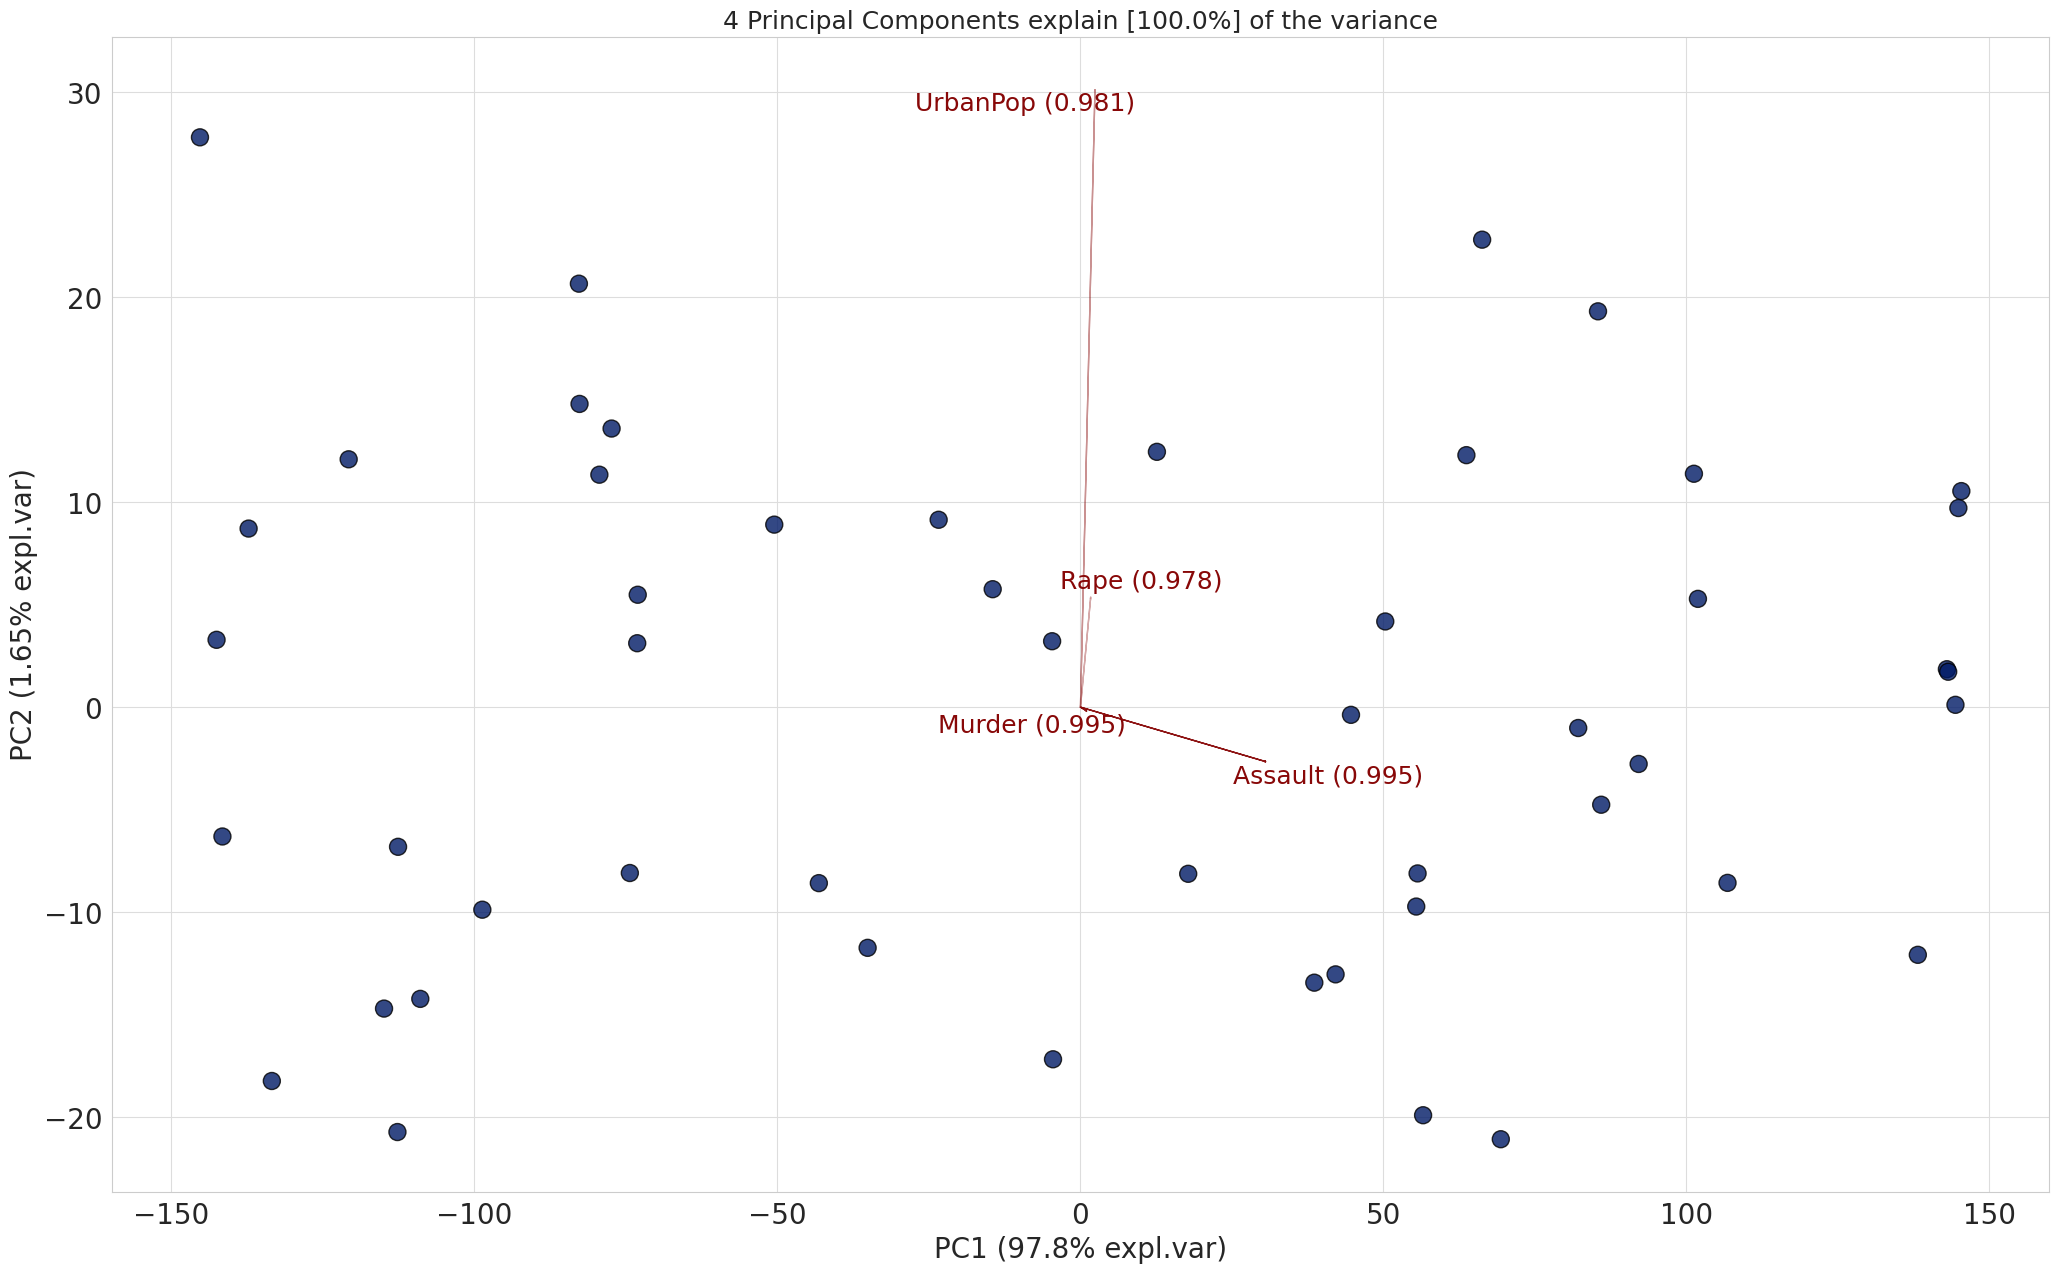

In [96]:
from pca import pca

# Load the US Arrests data
us_arrests_data = {
    'Murder': [13.2, 10.0, 8.1, 8.8, 9.0, 7.9, 3.3, 5.9, 15.4, 17.4, 5.3, 2.6, 10.4, 7.2, 2.2, 6.0, 9.7, 15.4, 2.1, 11.3, 2.7, 16.5, 9.0, 6.0, 4.3, 12.1, 2.5, 0.8, 7.1, 11.4, 13.0, 6.8, 4.5, 12.2, 9.7, 6.6, 3.4, 14.4, 10.9, 11.1, 13.0, 6.3, 3.4, 1.4, 12.5, 9.0, 6.9, 4.2, 12.9, 5.3],
    'Assault': [236, 263, 294, 190, 276, 204, 110, 238, 335, 211, 46, 120, 249, 113, 56, 115, 109, 249, 83, 300, 72, 251, 120, 151, 96, 255, 53, 62, 178, 188, 337, 142, 169, 332, 293, 336, 86, 279, 159, 285, 337, 51, 120, 82, 257, 275, 243, 233, 337, 80],
    'UrbanPop': [58, 48, 80, 50, 91, 78, 77, 72, 80, 60, 83, 54, 62, 72, 66, 75, 82, 64, 39, 67, 70, 53, 65, 56, 51, 83, 51, 39, 71, 70, 91, 72, 74, 68, 87, 82, 45, 70, 53, 72, 80, 60, 67, 53, 95, 73, 76, 58, 90, 44],
    'Rape': [21.2, 44.5, 31.0, 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2, 14.2, 24.0, 21.0, 11.3, 18.0, 16.3, 22.2, 7.8, 27.8, 16.1, 17.5, 16.8, 15.6, 9.0, 35.1, 8.1, 11.6, 26.8, 23.0, 16.1, 21.4, 24.8, 18.0, 26.2, 20.2, 12.8, 22.5, 18.5, 25.5, 22.9, 11.6, 18.9, 8.3, 28.9, 24.9, 21.9, 17.1, 26.4, 12.8]
}

# State names
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# Create DataFrame
df = pd.DataFrame(us_arrests_data, index=states)

print("US Arrests Data (first 5 rows):")
print(df.head())
print("\nData shape:", df.shape)


model = pca(n_components=4)
out = model.fit_transform(df)   # reduces df to 2 PCs
ax = model.biplot(n_feat=len(df.columns), legend=False)


## Prettier plots

* https://erdogant.github.io/pca/pages/html/Plots.html#biplot

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 4 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

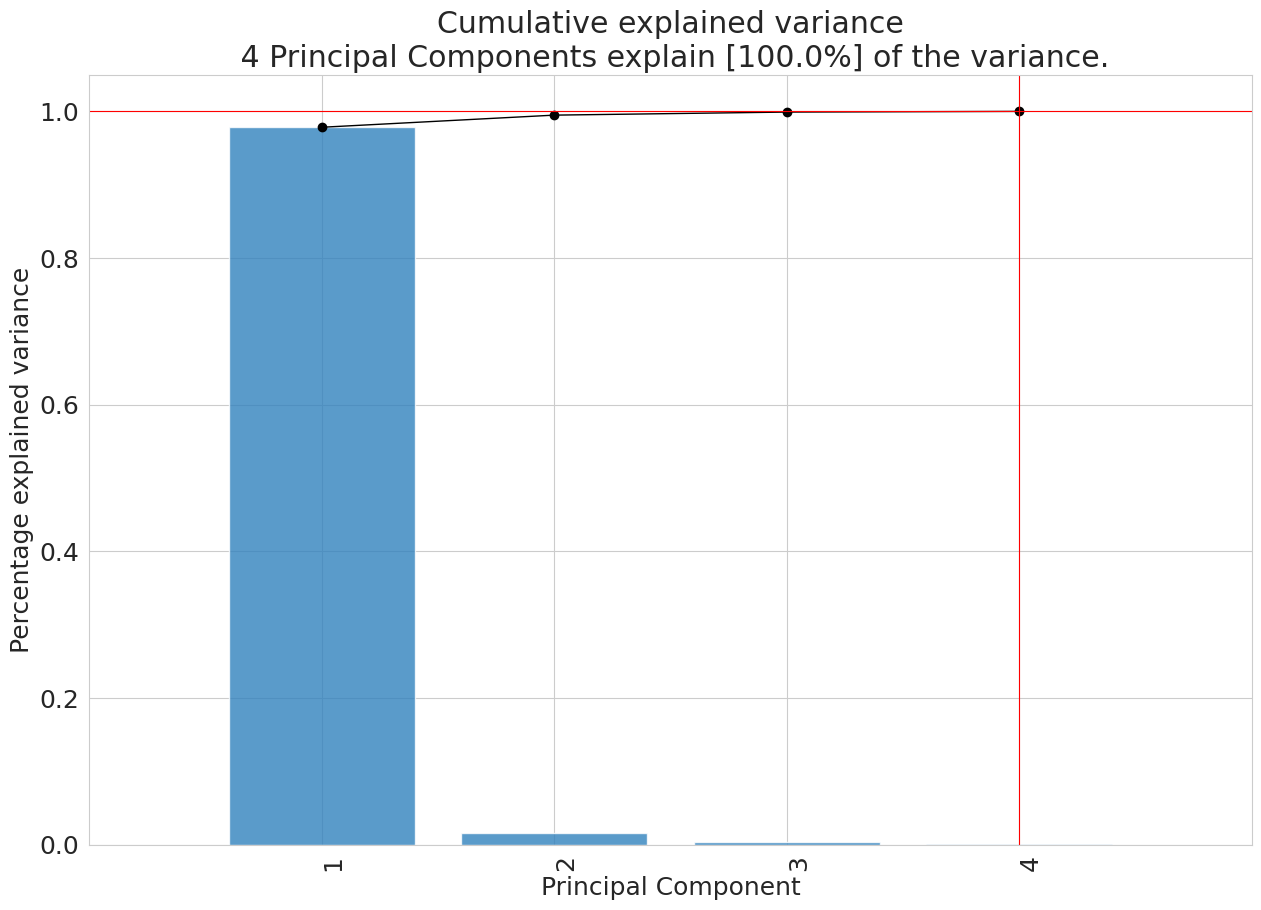

In [97]:
model.plot()


[04-08-2025 12:13:11] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[04-08-2025 12:13:11] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (97.8% expl.var)', ylabel='PC2 (1.65% expl.var)', zlabel='PC3 (0.41% expl.var)'>)

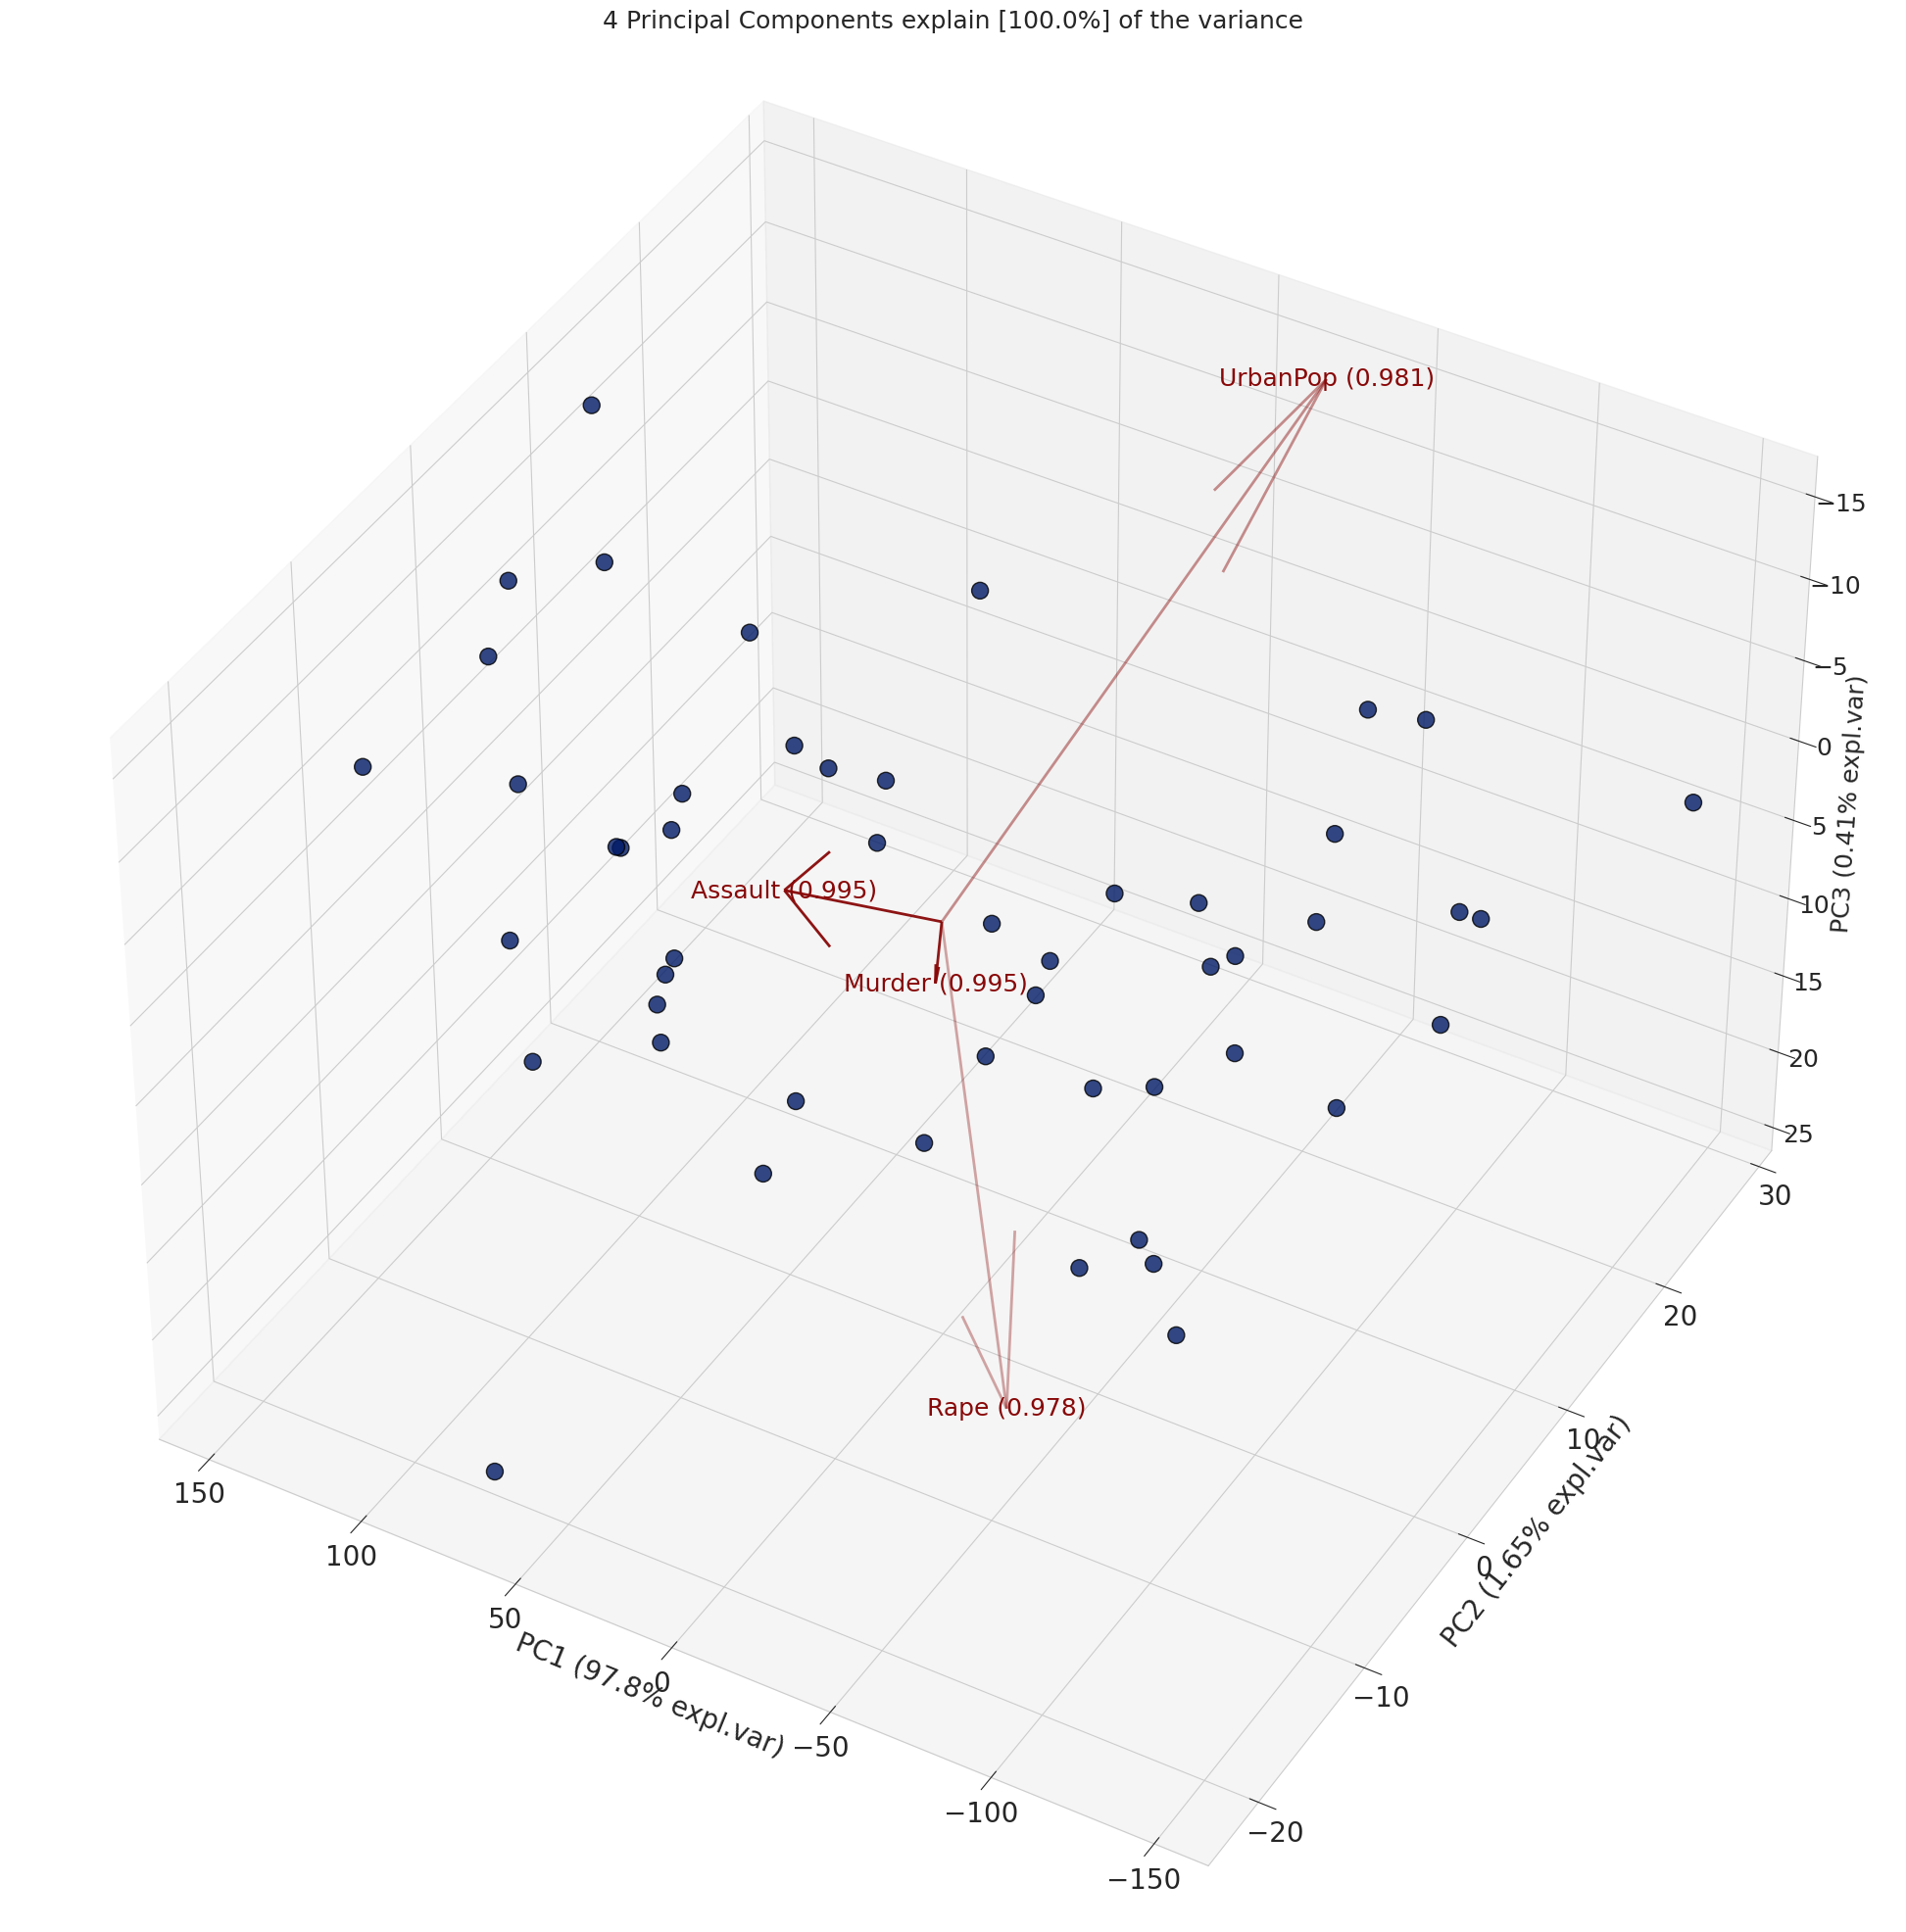

In [98]:
model.biplot3d()


# Optional material

### **Covariance Matrix**

* Tells us how variables vary together.
* PCA uses this to find directions where the data varies the most.

Covariance between variables $x$ and $y$:

$$
\text{Cov}(x, y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

### **Eigenvectors and Eigenvalues**

* Eigenvectors = directions (principal components)
* Eigenvalues = amount of variance explained by each component


## Equation of the First Principal Component (PC1)

The first principal component (PC1) is a linear combination of the original standardized features. The coefficients of this linear combination are the loadings for the first principal component.

If we have $p$ original features $x_1, x_2, \dots, x_p$, and the loadings for the first principal component are $l_{1,1}, l_{1,2}, \dots, l_{1,p}$, then the score for a sample on the first principal component ($PC1_{score}$) is calculated as:

$$
PC1_{score} = l_{1,1} \cdot x_{1, \text{standardized}} + l_{1,2} \cdot x_{2, \text{standardized}} + \dots + l_{1,p} \cdot x_{p, \text{standardized}}
$$


Where:
- $PC1_{score}$ is the score of a sample on the first principal component.
- $l_{1,j}$ is the loading of the $j$-th original feature on the first principal component.
- $x_{j, \text{standardized}}$ is the standardized value of the $j$-th original feature for that sample.

The loadings ($l_{1,j}$) are the elements of the first eigenvector of the covariance matrix (or correlation matrix, if using standardized data) of the original features, scaled appropriately. They indicate the weight and direction of each original feature's contribution to the principal component.